In [11]:
import pandas as pd
import warnings
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df_providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
df_ambulatory_visits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
df_ed_visits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
df_patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
df_re_admission_registry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
df_discharge = pd.read_excel("HospitalDatabase.xlsx","Discharges")

# 1. Use Lambda function to find how many Providers have speciality as Prediatrics

In [97]:
sum(df_providers["ProviderSpecialty"].apply(lambda x : x == "Pediatrics" ))

9

# 2. Describe ReAdmissionRegistry

This function returns descriptive statistics about the data. This includes minimum, maximum, mean (central tendency), standard deviation (dispersion) of the values in numerical columns, and the count of all non-null values in the data.

In [98]:
df_re_admission_registry.describe()

,AdmissionID,PatientID,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
count,720.000000,720.000000,720.000000,720.000000,194.0,194.000000,341.0
mean,360.500000,366.158333,8.824589,0.338063,1.0,5.360825,1.0
std,207.990384,218.223501,4.034421,0.238868,0.0,3.866116,0.0
min,1.000000,1.000000,2.012974,0.000006,1.0,1.000000,1.0
25%,180.750000,175.750000,5.138501,0.139771,1.0,3.000000,1.0
50%,360.500000,353.500000,8.633825,0.297242,1.0,5.000000,1.0
75%,540.250000,557.250000,12.107623,0.496387,1.0,5.000000,1.0
max,720.000000,742.000000,16.998213,0.989945,1.0,19.000000,1.0


# 3. Rename column DateofBirth to BirthDate and Gender to Sex  in Patients table and commit the changes.

This is the simplest method to easily change the selected column name. all you need to do is pass a dictionary where the key is the old column name and the value is the new column name.

In [99]:
df_patients = pd.read_excel("HospitalDatabase.xlsx","Patients")

In [100]:
df_patients.rename(columns = {"DateOfBirth":"BirthDate","Gender":"Sex"}, inplace = True)
df_patients

,PatientID,FirstName,LastName,BirthDate,Sex,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


# 4. Configuring Options and Settings

Pandas comes with a set of user-configurable options and settings. They’re huge productivity boosters since they let you tailor your Pandas environment exactly to your liking.

We can, for example, change some of Pandas’s display settings to change how many rows and columns are shown and to what precision floating point numbers are displayed.

In [117]:
import pandas as pd

display_settings = {
    'max_columns': 12,
    'expand_frame_repr': True,  # Wrap to multiple pages
    'max_rows': 20,
    'precision': 2,
    'show_dimensions': True
}

for op, value in display_settings.items():
    pd.set_option("display.{}".format(op), value)

In [102]:
df_patients

,PatientID,FirstName,LastName,BirthDate,Sex,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


# 5. Compare the race of patients based on their Sex

<Axes: xlabel='Race', ylabel='count'>

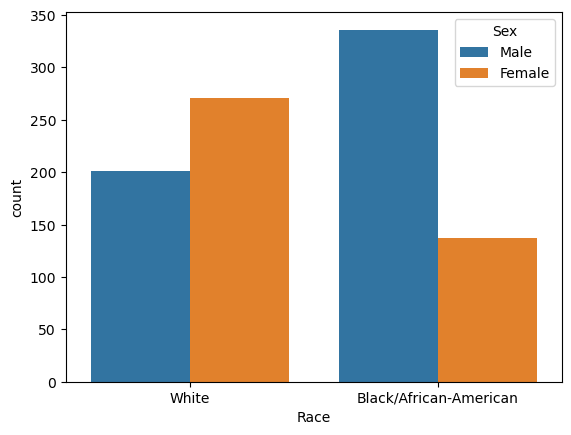

In [103]:
sns.countplot(data= df_patients,x="Race",hue="Sex")

# 6. Put the patients in group based on their Age

In [106]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month,
                                      today.day) < (born.month,
                                                    born.day))
df_patients['Date'] = (pd.to_datetime(df_patients['BirthDate']).dt.date).astype(str)
df_patients['Age'] = df_patients['Date'].apply(age)
df_patients
bins= [30,40,50,60,70,80]
labels = ['30-40','40-50','50-60','60-70','70-80']
df_patients['AgeGroup'] = pd.cut(df_patients['Age'], bins=bins, labels=labels, right=False)
df_patients


,PatientID,FirstName,LastName,BirthDate,Sex,Race,Language,Date,Age,AgeGroup
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960-01-01,63,60-70
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985-11-15,37,30-40
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976-04-15,47,40-50
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968-10-15,54,50-60
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962-05-01,60,60-70
...,...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986-05-26,36,30-40
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970-06-10,52,50-60
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983-01-08,40,40-50
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963-06-05,59,50-60


# 7. Calculate the number of patients in each age group

In [107]:
x = df_patients["PatientID"].groupby(df_patients["AgeGroup"]).count()
x

AgeGroup
30-40    130
40-50    359
50-60    332
60-70    124
70-80      0
Name: PatientID, Length: 5, dtype: int64

# 8. Display the Providers information based on their speciality as input from user

In [109]:
name = input("Enter the Provider Speciality: ").title()
df_providers[df_providers["ProviderSpecialty"] == name]


Enter the Provider Speciality: cardiology


,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
16,17,Kent Kendall,Cardiology,2001-12-22 11:18:32.919
17,18,Ryan Kevin,Cardiology,2003-01-14 21:16:34.778
18,19,Tyler Conner,Cardiology,2003-07-09 02:41:40.410
19,20,Bailey Barret,Cardiology,2003-08-20 16:05:50.179
20,21,Megan Bonco,Cardiology,2004-02-17 21:22:30.546
21,22,Joesph Walter,Cardiology,2005-02-04 11:40:44.121
22,23,Walter King,Cardiology,2006-03-12 22:11:58.070
23,24,Luke Long,Cardiology,2006-04-28 00:16:36.762


# 9. How many patients have BloodPressureSystolic above 120 and have VisitStatus as "No Show"

In [110]:
df_ambulatory_visits[(df_ambulatory_visits["BloodPressureSystolic"] > 120) & (df_ambulatory_visits["VisitStatus"]=="No Show")]["VisitID"].count()

153

# 10. Display the names of patients who visited "Chest pain" and have acuity equal to 5

In [111]:
df = pd.merge(df_patients,df_ed_visits,how='inner',on='PatientID')
df[(df_ed_visits["ReasonForVisit"] == "Chest Pain")  & (df_ed_visits["Acuity"] == 5)]["FirstName"]

# patient_id = df_ed_visits[(df_ed_visits["ReasonForVisit"] == "Chest Pain")  & (df_ed_visits["Acuity"] == 5)]["PatientID"]
# patient_id

8          Devlin 
9          Devlin 
10         Devlin 
28          Zonnya
38         Gerhold
          ...     
461       Gherardo
483           Lang
484    Greenfelder
485    Greenfelder
503          Hauck
Name: FirstName, Length: 61, dtype: object

# 11. Display the count of male and female for each Age Group

<Axes: xlabel='AgeGroup', ylabel='count'>

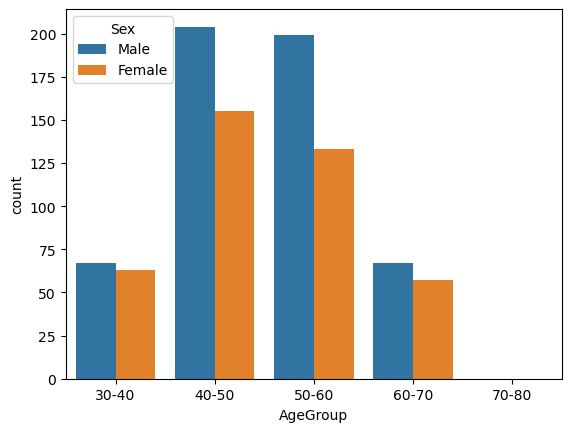

In [114]:
sns.countplot(df_patients,x = "AgeGroup", hue = "Sex")

# 12. Get the relative frequencies of men and women in the dataset

In [74]:
df_patients['Gender'].value_counts(normalize=True)

Male      0.568254
Female    0.431746
Name: Gender, dtype: float64

# 13. Display the providers name with their experience

In [115]:
df_providers["Experience"] = (pd.to_datetime('today').year- df_providers["ProviderDateOnStaff"].dt.year)
df_providers

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,Experience
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,30
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,30
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,30
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,30
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,28
...,...,...,...,...,...
35,36,Holly Hue,PrimaryCare,2012-06-24 06:55:22.021,11
36,37,Trent Tye,PrimaryCare,2013-01-12 15:32:21.137,10
37,38,Kimberly Cone,PrimaryCare,2013-05-23 05:17:19.360,10
38,39,Harry West,PrimaryCare,2013-07-14 00:22:03.151,10


# 14. Top 2 primary diagnosis with highest mortality

In [134]:
sorted_df = df_re_admission_registry.sort_values(by=['ExpectedMortality'], ascending=False)
sorted_df["PrimaryDiagnosis"].head(2)

553    Pneumonia
90        Stroke
Name: PrimaryDiagnosis, Length: 2, dtype: object

# 15. Compare the Visit status

([<matplotlib.patches.Wedge at 0x1bcd9fd1300>,
 [Text(-0.8358556169157738, 0.7150841822263665, 'No Show'),
  Text(0.6785007747857144, -0.8658156262248825, 'Completed'),
  Text(1.078417932705331, -0.21682887819559615, 'Canceled')],
 [Text(-0.455921245590422, 0.39004591757801804, '77%'),
  Text(0.3700913317012987, -0.47226306884993585, '16%'),
  Text(0.5882279632938168, -0.11827029719759789, '6%')])

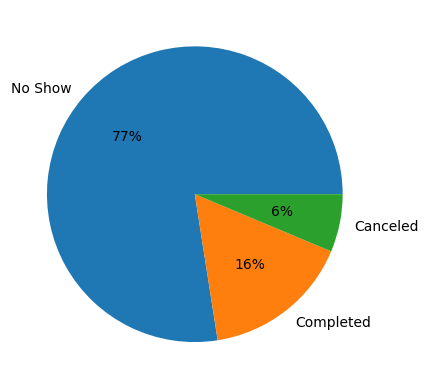

In [151]:
id = df_ambulatory_visits['VisitStatus'].value_counts()
labels = df_ambulatory_visits['VisitStatus'].unique()
plt.pie(id,labels=labels,autopct='%.0f%%')

# 16. show the patients record who have BP in  range- systolic <130 and diastolic < 80

In [158]:
df_ambulatory_visits[(df_ambulatory_visits["BloodPressureSystolic"] < 130) & (df_ambulatory_visits["BloodPressureDiastolic"] <80)]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
5,809,894,31,2019-03-13,2019-02-28 10:28:01.091,2,Physical,121.0,57.69,60.40,No Show
19,710,862,1,2019-03-19,2019-03-03 11:39:03.145,9,Telemedicine,127.0,66.41,94.54,No Show
23,711,863,1,2019-03-20,2019-03-10 07:34:56.766,10,Telemedicine,124.0,77.30,77.93,No Show
68,713,865,3,2019-03-22,2019-03-12 10:22:59.009,12,Telemedicine,121.0,59.82,91.07,No Show
87,720,872,10,2019-03-29,2019-03-01 01:59:33.979,11,Telemedicine,127.0,76.09,96.35,No Show
...,...,...,...,...,...,...,...,...,...,...,...
908,183,821,38,2019-02-28,2019-02-27 12:25:16.573,3,Telemedicine,121.0,74.31,95.33,Canceled
909,177,815,32,2019-02-22,2019-02-04 06:53:41.987,9,Follow Up,122.0,67.62,52.74,Canceled
929,786,871,34,2019-03-25,2019-02-26 09:48:42.832,3,Telemedicine,122.0,78.21,53.76,Canceled
941,399,638,11,2019-02-10,2019-02-02 20:49:56.868,2,Physical,121.0,64.90,68.50,Canceled


# 17.Find the patient transfer rate

In [163]:
transferred_patients = len(df_discharge[df_discharge['DischargeDisposition'] == 'Transfer'])
total_discharged = df_discharge['DischargeDisposition'].count().round(2).astype(int)
print("The patient transfer rate is :" ,round((transferred_patients / total_discharged) , 2))

The patient transfer rate is : 0.05


# 18. What is the average acuity level of patients who were discharged versus those who were admitted?

In [164]:
discharged_acuity_avg = df_ed_visits.loc[df_ed_visits['EDDisposition'] == 'Discharged']['Acuity'].mean()
admitted_acuity_avg = df_ed_visits.loc[df_ed_visits['EDDisposition'] == 'Admitted']['Acuity'].mean()
print('The average acuity level for patients who were discharged is', round(discharged_acuity_avg,2))
print('The average acuity level for patients who were admitted is', round(admitted_acuity_avg,2))
# Optimized Code
df_ed_visits.groupby('EDDisposition')['Acuity'].mean()

The average acuity level for patients who were discharged is 1.4
The average acuity level for patients who were admitted is 3.55


EDDisposition
Admitted      3.55
Discharged    1.40
Name: Acuity, Length: 2, dtype: float64